Text(0, 0.5, 'y')

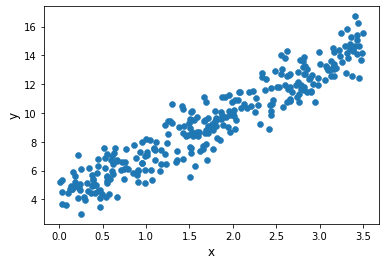

In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Generating linear data

X = 3.5 * np.random.rand(300, 1)
y = 4 + 3 * X + np.random.randn(300, 1)

plt.scatter(X, y, linewidth=0.5)
plt.xlabel("x", fontsize = "12")
plt.ylabel("y", fontsize = "12")

In [5]:
## Computing our parameter theta using the normal equation.

print(len(X), len(y))

#Add bias term in X for all 300 instances
X_train = np.c_[np.ones((300,1)), X]
print(X_train[:10])

300 300
[[1.         3.02123218]
 [1.         2.58412147]
 [1.         2.07386431]
 [1.         2.03703457]
 [1.         0.54127235]
 [1.         2.24919992]
 [1.         2.59759362]
 [1.         1.9824675 ]
 [1.         0.11293985]
 [1.         2.21937394]]


In [6]:
theta_optimal = np.linalg.inv(X_train.transpose()@(X_train))@(X_train.transpose())@(y)

In [7]:
theta_optimal

array([[3.98245087],
       [2.9640341 ]])

In [8]:
#Making predictions using theta_optimal
X_new = np.array([[0.13],[3.49]])
X_new_bias = np.c_[np.ones(theta_optimal.shape), X_new]

print("Theta dimensions: ", theta_optimal.shape)
print("X dimensions: ", X_new_bias.shape)
print(X_new_bias)

y_prediction = X_new_bias @ theta_optimal
print("\n\nPredictions\n", y_prediction)

Theta dimensions:  (2, 1)
X dimensions:  (2, 2)
[[1.   0.13]
 [1.   3.49]]


Predictions
 [[ 4.3677753 ]
 [14.32692987]]


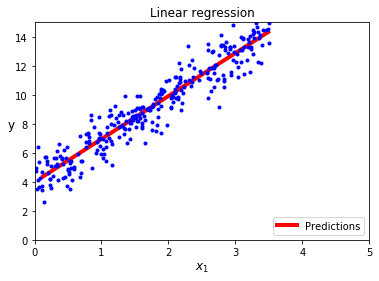

In [9]:
plt.plot(X_new, y_prediction, "r-", linewidth ="4", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0,5,0,15])
plt.title("Linear regression")
plt.legend(loc="lower right")
plt.xlabel("$x_1$", fontsize = 12)
plt.ylabel("y", rotation = 0, fontsize = 12)
plt.show()

## Using Linear Regression from Scikit-Learn

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
model = lin_reg.fit(X, y)

In [11]:
print(model.coef_, model.intercept_) #Similar to our calculation from the normal equation

[[2.9640341]] [3.98245087]


In [12]:
#Prediction on our new data points
model.predict(X_new)

array([[ 4.3677753 ],
       [14.32692987]])

In [13]:
#Another way of calculating optimal theta. 
#LinearRegression is based on np.linalg.lstsq

theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_train, y, rcond=1e-6)
theta_best_svd

array([[3.98245087],
       [2.9640341 ]])

In [14]:
#Another way of calculating optimal theta. 
np.linalg.pinv(X_train)@y

array([[3.98245087],
       [2.9640341 ]])

## Batch Gradient Descent implementation

In [15]:
def gradient_calculation(alpha, m):
    theta = np.random.randn(2,1)
    for i in range(0,1000):
        gradient = (2/m) * (X_train.transpose() @ (X_train @ theta - y))
        theta = theta - alpha * gradient
    return theta

In [16]:
gradient_calculation(0.03, 300)

array([[3.98244241],
       [2.964038  ]])

In [17]:
#Trying out for different learning rate values

m = 300 #Training set size
alpha_variations = [0.0001, 0.02, 0.1, 0.21]
theta_gradients = []
for alpha in alpha_variations:
    theta_gradients.append(gradient_calculation(alpha, m))
    

In [210]:
theta_gradients

[array([[1.91222905],
        [1.62963222]]),
 array([[3.88553163],
        [3.0698543 ]]),
 array([[3.88598405],
        [3.06964842]]),
 array([[ -6.99842505],
        [-20.8491856 ]])]

In [211]:
#Predicting with the different theta values
def predict_value(X_new_bias, theta):
    return X_new_bias @ theta

[[2.12408124]
 [7.59964548]]
[[ 4.28461269]
 [14.59932313]]
[[ 4.28503834]
 [14.59905704]]
[[ -9.70881918]
 [-79.7620828 ]]


[0, 5, -80, 15]

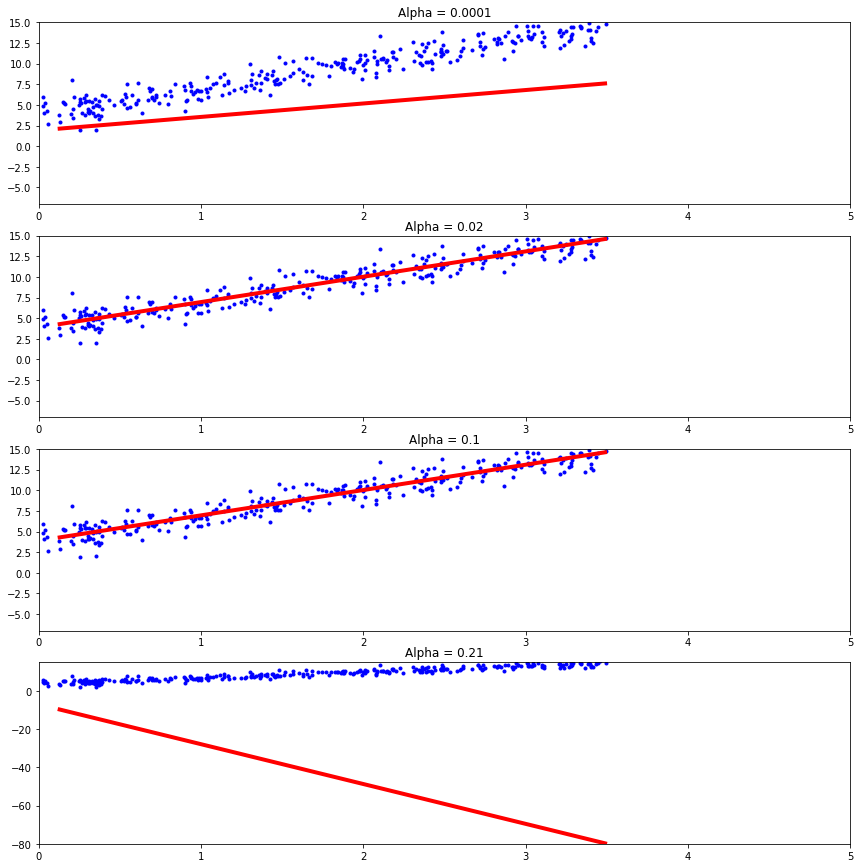

In [219]:
#Plotting to understand how the different alphas affect the convergence and best-fit line
fig, axs=plt.subplots(4,1, figsize=(12,12))
fig.tight_layout()
for i in range(len(alpha_variations)):
    axs[i].plot(X, y, "b.", linewidth ="2", label="Predictions")
    axs[i].set_title("Alpha = " + str(alpha_variations[i]))
    y_prediction = predict_value(X_new_bias, theta_gradients[i])
    print(y_prediction)
    axs[i].plot(X_new, y_prediction, "r-", linewidth ="4", label="Predictions")
    axs[i].axis([0,5,-7,15])

#y_prediction[3] varies a lot from the rest
#Creating a different axis for display purposes.

axs[3].axis([0,5,-80,15])

## Stochastic Gradient Descent implementation

In [36]:
#SGD implementation with a learning schedule. 
#Gradually decrease the learning rate per iteration to reach an optimal global minimum

n_epochs = 50

#Playing around with a combo of hyperparameters and see the theta values.
#50 values of to,t1
t_pairs = []
for t0 in range(5,25,5):
    for t1 in range(25,50,5):
        t_pairs.append((t0,t1))
print(t_pairs)       
def learning_schedule(t,t0,t1):
    return t0/ (t+t1)

theta = np.random.randn(2,1)
all_theta = []
for t0,t1 in t_pairs:
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X_train[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradients = 2 * xi.T@(xi@theta - yi)
            eta = learning_schedule(epoch * m + i, t0, t1)
            theta = theta - eta * gradients
    all_theta.append(theta)

[(5, 25), (5, 30), (5, 35), (5, 40), (5, 45), (10, 25), (10, 30), (10, 35), (10, 40), (10, 45), (15, 25), (15, 30), (15, 35), (15, 40), (15, 45), (20, 25), (20, 30), (20, 35), (20, 40), (20, 45)]


In [37]:
all_theta

[array([[3.93544872],
        [2.9682618 ]]),
 array([[3.98946266],
        [2.94745704]]),
 array([[3.97859837],
        [2.96545766]]),
 array([[3.94911871],
        [2.97265895]]),
 array([[3.98882023],
        [2.99191722]]),
 array([[3.97308613],
        [2.94621877]]),
 array([[3.9692672],
        [2.976002 ]]),
 array([[3.95670408],
        [2.97333348]]),
 array([[3.99432096],
        [3.03213801]]),
 array([[3.99736245],
        [2.99004672]]),
 array([[2.60607047],
        [3.58536488]]),
 array([[4.00569766],
        [2.93565302]]),
 array([[4.03500772],
        [2.91515652]]),
 array([[3.990069  ],
        [2.95281958]]),
 array([[3.94344211],
        [2.97075921]]),
 array([[4.02980657],
        [2.98798848]]),
 array([[3.90337065],
        [2.95965356]]),
 array([[4.0612659 ],
        [2.94331794]]),
 array([[4.02258522],
        [2.91355315]]),
 array([[3.9593584],
        [2.914857 ]])]

In [32]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_regressor.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([3.99467844]), array([2.99488477]))

## Mini-Batch Gradient Descent

In [45]:
theta_mgbd=[]
n_iterations = 50
to, t1, t = 200, 1000, 0
miniB_size = 20

def l_schedule(t):
    return t0/(t+t1)
    
theta_m = np.random.randn(2,1)

for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_train[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,miniB_size):
        t += 1
        xi = X_train[i:miniB_size+i]
        yi = y[i:miniB_size+i]
        gradients = 2/(miniB_size) * xi.T@(xi@theta_m - yi)
        eta = l_schedule(t)
        theta_m = theta_m - eta * gradients
        theta_mgbd.append(theta_m)

In [47]:
theta_m

array([[3.97299832],
       [2.99017255]])

## Polynomial Regression

Text(0, 0.5, 'y')

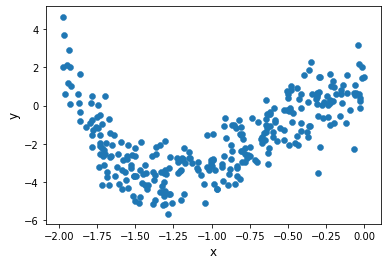

In [3]:
#Generating non-linear data
m = 300
X = 2 * np.random.rand(m, 1) - 2
y = 0.9 + 3 * X + 2 * X**4 + 3 * X**3 + np.random.randn(m, 1)

plt.scatter(X, y, linewidth=0.5)
plt.xlabel("x", fontsize = "12")
plt.ylabel("y", fontsize = "12")

In [61]:
from sklearn.preprocessing import PolynomialFeatures

#Adding the cube and 4th power features to the training set.

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [62]:
X[0]

array([-1.21063876])

In [63]:
X_poly[0]

array([-1.21063876,  1.4656462 , -1.77436809,  2.14811878])

In [64]:
#Now we train our LR model with these features
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([0.85835917]),
 array([[ 1.54861514, -3.84631369, -0.15026947,  1.18972838]]))

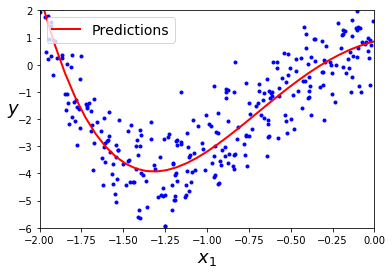

In [69]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg_poly.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-2, 0, -6, 2])
plt.show()

## Learning Curves

In [22]:
#Plotting learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_LC(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.legend(loc='best')

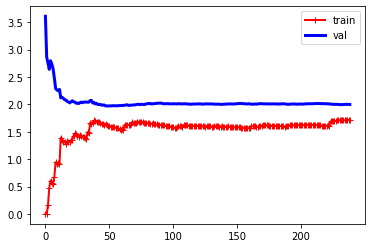

In [29]:
lin_reg = LinearRegression()
plot_LC(lin_reg, X, y)

## Ridge Regression (Tikhonov regularization)

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky") #cholesky:uses the standard scipy.linalg.solve function to obtain a closed-form solution.
ridge_reg.fit(X,y)
ridge_reg.predict([[-0.5]])

array([[-1.0345033]])

In [33]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel()) #ravel returns a flattened array
sgd_reg.predict([[-0.5]])

array([-1.10572058])

## Lasso Regression

In [34]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[-0.5]])

array([-1.17718887])

In [35]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel()) #ravel returns a flattened array
sgd_reg.predict([[-0.5]])

array([-1.09335752])

## ElasticNet Regression

In [36]:
#Mix of Lasso and Ridge
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[-0.5]])

array([-1.18084073])

# Logistic Regression

In [51]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris["data"][:,(2,3)]
y = iris["target"]
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [46]:
print(iris.feature_names)
print(iris.target_names)
print(len(iris.data))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
150


In [52]:
#Multinomial logistic regression model
from sklearn.linear_model import LogisticRegression
log_reg_classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', verbose=1, C=10) #For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.
log_reg_classifier.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [55]:
log_reg_classifier.predict([[1,1]])

array([0])

In [56]:
log_reg_classifier.predict_proba([[1,1]])

array([[9.99529476e-01, 4.70523926e-04, 4.26824723e-13]])

In [57]:
log_reg_classifier.predict([[5,2]])

array([2])

In [58]:
log_reg_classifier.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# Exercises

In [ ]:
#BGD with early stopping for Softmax regression without scikit.learn
#BGD implementation already done above for Linear regression in functions: gradient_calculation and predict_value
#Have to add part of early stopping
#Early stopping is done to prevent overfitting. As soon as validation error starts increasing stop the training.
#In our case that would mean finding the correct theta value such that it is generalizable and not just computing correct values on the training set.
#Have to split X and y into 
#Lets use mnist dataset for softmax regression and make this interesting
    

In [66]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])


In [67]:
mnist.data[0]
X, y = mnist["data"], mnist["target"]
print(X.shape, y.shape)

(70000, 784) (70000,)


In [71]:
import numpy as np
#Convert target to int
y = y.astype(np.uint8)

#Train and test set split.
#Split is already done. First 60K images are for training and the remaining 10K is for test.

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [123]:
def column(matrix, i):
    return [col[i] for col in matrix]

In [235]:
def softmax_calc(scores):
    scores -= np.max(scores)
    softmax = (np.exp(scores).T / np.sum(np.exp(scores),axis=1)).T
    return softmax

In [236]:
#Will have to convert the classes into one hot values
def oneHot_convert(y):
    y_list = list(list())
    for i in range(0,10):
        i_list = list()
        for itr in y: #IMPROVEMENT: Instead of containing 70k values per key. Could store just the index of positive class as the value of key.
            if(i == itr):
                i_list.append(1)
            else:
                i_list.append(0)
        y_list.append(i_list)
    return y_list # k x m matrix

def cross_entropy_cost(X,y,theta): #X: m x n matrix. theta: k x n matrix. 
    m = X.shape[0] #70000
    cost = 0
    prediction = np.array(X @ theta.transpose()) # m x k matrix
    probability = np.array(softmax_calc(prediction)) # m X k matrix
    y_list = np.array(oneHot_convert(y)) #k x m matrix
    cost = -(1/m) * np.sum(y_list.transpose() * np.log(probability))
    gradient = np.array((1 / m) * (np.array(probability) - y_list.transpose()).transpose() @ X)
    return cost, gradient.transpose()

In [220]:
def predict_class(X, theta):
    prediction = X @ theta.transpose() # m x k matrix
    probability = softmax_calc(prediction)
    output = [np.argmax(i, axis=0) for i in probability]
    return output # m x 1 matrix of all predictions

In [206]:
#Driver
theta = np.zeros([X_train.shape[1],len(np.unique(y_train))])
print(theta.shape)
iterations = 1000
learningRate = 1e-5
costs = []
for i in range(0,iterations):
    cost,gradient = cross_entropy_cost(X_train,y_train,theta.transpose())
    costs.append(cost)
    theta = theta - (learningRate * gradient)
print(cost)

(784, 10)
0.2849817178541455


In [189]:
a = [[1,2,3],[4,5,6],[7,8,9]]
np.array(a).shape

(3, 3)

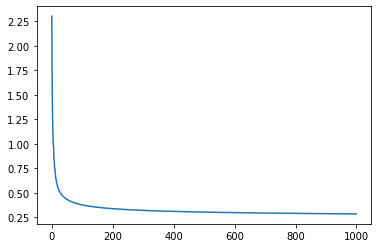

In [214]:
#So basically for early stopping 
#In every iteration I will use the gradient to predict the values and calculate the loss. Once this loss reaches a min and starts increasing we have to stop..
import matplotlib.pyplot as plt
plt.plot(costs)

In [221]:
y_predict = predict_class(X_test,theta.transpose())

In [222]:
print(y_predict)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4, 7, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 7, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 3, 0, 8, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 5, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 6, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [233]:
def calc_accuracy(X,y):
    y_predict = predict_class(X,theta.transpose())
    accuracy = np.sum(y_predict == y)/(float(len(y)))
    return accuracy

In [234]:
print ('Training Accuracy: '+ str(calc_accuracy(np.array(X_train),np.array(y_train))))
print ('Test Accuracy: '+ str(calc_accuracy(np.array(X_test),np.array(y_test))))

Training Accuracy: 0.9210166666666667
Test Accuracy: 0.9208
